In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp

# CEH crop data

The UK Centre for Ecology and Hydrology Land Cover Plus crop maps (https://www.ceh.ac.uk/services/ceh-land-cover-plus-crops-2015) use remote sensing data from two satellites, Copernicus Sentinel-1 C-band SAR and Sentinel-2 optical imaging, to generate a catalog of land parcels classified by crop types.
Data can be accessed through a free academic licence from Digimap (https://digimap.edina.ac.uk/environment)

In this notebook we plot the positions and crop types within the historic county of Yorkshire.
To obtain the Yorkshire county boundaries we use border data from https://osdatahub.os.uk/downloads/open/BoundaryLine, which can be accessed for free.

We will use HEALPY, a spherical pixelisation package to generate a low resolution crop map of Yorkshire.

In [2]:
border_file = 'data/LUC/data/bdline_gb.gpkg'
crop_file = 'data/LUC/lccm-2021_4509500.gdb'

In [3]:
fiona.listlayers(border_file)

['boundary_line_ceremonial_counties',
 'boundary_line_historic_counties',
 'community_ward',
 'country_region',
 'county',
 'county_electoral_division',
 'district_borough_unitary',
 'district_borough_unitary_ward',
 'english_region',
 'greater_london_const',
 'high_water',
 'historic_european_region',
 'parish',
 'polling_districts_england',
 'scotland_and_wales_const',
 'scotland_and_wales_region',
 'unitary_electoral_division',
 'westminster_const']

In [4]:
# Yorkshire = 66
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
polygon = counties['geometry'].iloc[66]
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((422004.502 199086.601, 422030...."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((460619.899 235588.003, 460625...."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((499772.602 215220.503, 499795...."
3,Herefordshire,Historic County,"MULTIPOLYGON (((335069.501 272770.499, 335082...."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((424473.304 224921.896, 424502...."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((456472.501 274014.303, 456299...."
91,Dorset,Historic County,"MULTIPOLYGON (((333203.198 91375.703, 333185.9..."
92,Devon,Historic County,"MULTIPOLYGON (((333223.945 91353.145, 333218.0..."
93,Banffshire,Historic County,"MULTIPOLYGON (((349516.703 868874.397, 349519...."


In [5]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [6]:
crops = gpd.read_file('data/LUC/lccm-2021_4509500.gdb', mask = polygon)
crops['centroid'] = crops.centroid
crops['area'] = crops.area
crops = crops.set_geometry('centroid')
crops

,gid,crop_code,parent,poly_id,crop_name,geometry,centroid,area
0,687640,po,0,2294463,Potatoes,"MULTIPOLYGON (((453670.998 412633.607, 453609....",POINT (453753.263 412753.212),31742.309282
1,1096422,po,0,2328167,Potatoes,"MULTIPOLYGON (((432261.452 472876.230, 432241....",POINT (432128.791 472860.870),47535.202845
2,1104430,po,0,2296752,Potatoes,"MULTIPOLYGON (((455734.138 421471.680, 455613....",POINT (455682.358 421589.597),23601.796053
3,2726338,po,0,2320525,Potatoes,"MULTIPOLYGON (((450199.436 448968.324, 450067....",POINT (450050.415 448971.484),31351.594160
4,59161,po,0,2314975,Potatoes,"MULTIPOLYGON (((482104.638 437530.100, 482197....",POINT (482248.887 437633.203),55905.108800
...,...,...,...,...,...,...,...,...
125035,343517,so,0,2301967,Spring oats,"MULTIPOLYGON (((450119.286 437656.508, 450191....",POINT (450190.393 437509.690),68678.318668
125036,348751,so,0,2315287,Spring oats,"MULTIPOLYGON (((488805.622 440893.934, 488982....",POINT (488744.682 440761.129),62240.175824
125037,351368,so,0,2344851,Spring oats,"MULTIPOLYGON (((490974.838 478507.140, 490980....",POINT (491061.811 478375.351),35739.688410
125038,358247,so,0,443622,Spring oats,"MULTIPOLYGON (((473701.038 440842.319, 473660....",POINT (473822.594 441009.457),41315.752125


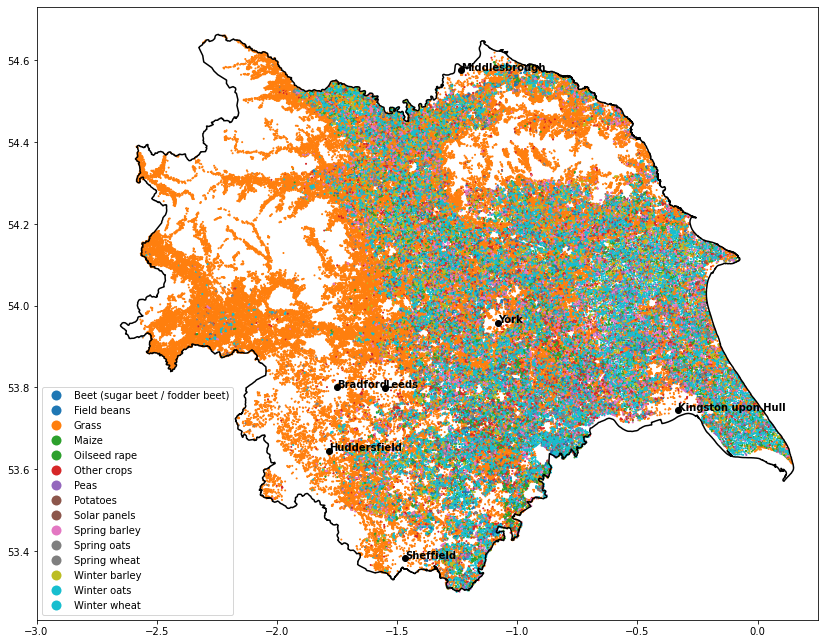

In [7]:
crops = crops.to_crs(epsg=4326)
counties = counties.to_crs(epsg=4326)

base = counties.iloc[66:67].boundary.plot(color = 'k', figsize = (14,14))
crops.plot('crop_name', ax=base, legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

plt.xlim(-3,0.25)
plt.savefig('Test_plot.png', dpi = 300)


In [8]:
NSIDE = 4096*2
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

NPIX = hp.nside2npix(NSIDE)
print(NPIX)

Approximate resolution at NSIDE 8192 is 0.0072 deg
805306368


In [9]:
ipix_york = hp.ang2pix(NSIDE, np.array(crops['centroid'].x), np.array(crops['centroid'].y), lonlat=True)
healpy_map = np.zeros(NPIX)
healpy_map[ipix_york] = 1

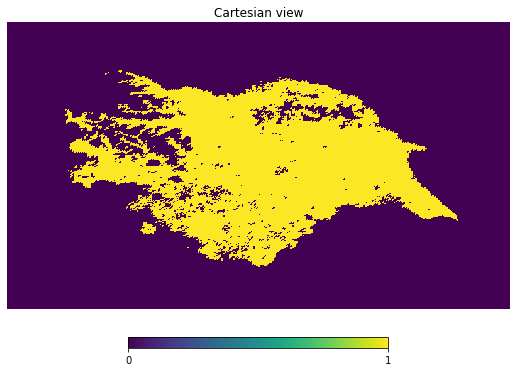

In [10]:
hp.cartview(healpy_map, lonra=[-3,0.5], latra=[53,55], flip='geo')